# Trabajo Práctico - Grupo 8


# Introducción y descripción del dataset

Para el desarrollo del trabajo práctico, seleccionamos un dataset de https://www.kaggle.com/datasets/yashkmd/credit-profile-two-wheeler-loan-dataset.

El conjunto de datos contiene los registros de perfiles de solicitudes de préstamos de personas en la India. Este conjunto de datos proporciona una visión completa de los perfiles de posibles solicitantes de préstamos, especialmente adaptados para la demografía india. Incluye una variedad de características, desde datos demográficos básicos hasta detalles financieros, que pueden ser fundamentales para evaluar la solvencia crediticia de un individuo.
* Edad:
Tipo: Entero
Descripción: Representa la edad del solicitante. Indica el nivel de madurez del solicitante.
Rango: 18 a 70

* Género:
Tipo: Categórico
Descripción: Género del solicitante.
Categorías: Masculino, Femenino, Otro

* Ingreso:
Tipo: Entero
Descripción: El ingreso del solicitante, que es fundamental para evaluar su capacidad para pagar el préstamo.
Rango: Múltiplos de 1000


* Puntuación de Crédito:
Tipo: Entero
Descripción: Una puntuación que cuantifica la solvencia crediticia del solicitante en función de su historial crediticio.
Rango: 300 a 850

* Antigüedad del Historial Crediticio:
Tipo: Entero
Descripción: Representa el número de meses desde la primera línea de crédito del solicitante. Indica la experiencia del solicitante en la gestión del crédito.
Unidades: Meses


* Número de Préstamos Existentes:
Tipo: Entero
Descripción: El número de préstamos que el solicitante tiene actualmente.
Rango: 0 a 10

* Monto del Préstamo:
Tipo: Entero
Descripción: La cantidad de dinero que el solicitante está solicitando.
Rango: 0 a 150,000

* Plazo del Préstamo:
Tipo: Entero
Descripción: El número de meses durante los cuales el solicitante desea pagar el préstamo.
Unidades: Meses


* Cliente Existente:
Tipo: Categórico
Descripción: Si el solicitante es un cliente existente de la empresa financiera.
Categorías: Sí, No

* Estado:
Tipo: Categórico
Descripción: El estado en la India donde reside el solicitante.
Categorías: Maharashtra, Delhi, Karnataka, Tamil Nadu, West Bengal, Uttar Pradesh, Gujarat, Rajasthan, Kerala, Telangana, etc.

* Ciudad:
Tipo: Categórico
Descripción: La ciudad o pueblo en la India donde reside el solicitante.
Categorías: **Mumbai**, Pune, **Nueva Delhi**, **Bengaluru**, Chennai, Kolkata, Ahmedabad, Jaipur, Kochi, **Hyderabad** y varios pueblos.

* Ratio LTV (Loan-to-Value):
Tipo: Decimal
Descripción: El ratio préstamo-valor, que representa la relación entre la cantidad del préstamo y el valor tasado del activo (normalmente una vivienda). LTV más altos pueden indicar un mayor riesgo.
Rango: 40% a 95%

* Perfil de Empleo:
Tipo: Categórico
Descripción: Categoría general de empleo del solicitante.
Categorías: Asalariado, Autónomo, Trabajador Independiente, Desempleado, Estudiante

* Ocupación:
Tipo: Categórico
Descripción: Ocupación específica o título laboral del solicitante.
Categorías: Ingeniero de Software, Médico, Profesor, Dueño de Negocio, Escritor, etc.

* Puntuación del Perfil:
Tipo: Entero
Descripción: Una puntuación que varía de 0 a 100 y representa el perfil general del solicitante basado en datos reales de pago de préstamos. Valores más altos indican perfiles mejores.
Rango: 0 a 100


# Planteamiento del objetivo del proyecto

El objetivo de este análisis es encontrar el modelo que mejor se ajuste para identificar grupos de personas propensas a riesgos crediticios y en una segunda instancia predecir sus puntajes crediticios.

Para realizar evitar sobrecargas a los algoritmos decidimos sacar las siguientes columnas:
* Ocupación
* Estado

# Planteamiento de hipótesis y resumen de las conclusiones sobre las hipótesis

Para el análisis del dataset, proponemos las siguientes hipótesis:


1. Las personas con antiguedad crediticia tienen trabajos más estables, esto se ve reflejado en la taza de 'LTV ratio' que tendra menor riesgo.  
2. Que rango etario tiene mejor puntuación de perfil?, esto depende de sus ingresos?, depende de la cantidad de prestamos tiene activo?

## Conclusiones:
Del análisis concluimos:
1. Que aquellas personas que se encuentren en una situación laboral estable, tendrán mejor puntaje crediticio. Además, encontramos que las personas con mayor antiguedad son aquellos con trabajos autónomos y quienes pueden tener su propia empresa/PYME, esto se puede deber a que recurrieron a un prestamos desde que empezaron su propio negocio.
2. Cuando mayor el ingreso, mejor es la puntuación crediticia, también observamos que aquellos que tienen mayor puntiación de perfil, tienen mayor número de préstamos. Con respecto al rango etario, no pudimos llegar a una conclusión.

In [1]:
#Importacion de librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


Matplotlib is building the font cache; this may take a moment.
/home/pari/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.0)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Sobre Dataset


In [2]:
credit_df = pd.read_csv("credit_data.csv")
credit_df.head()

,Age,Gender,Income,Credit Score,Credit History Length,Number of Existing Loans,Loan Amount,Loan Tenure,Existing Customer,State,City,LTV Ratio,Employment Profile,Profile Score,Occupation
0,31,Male,36000,604,487,5,109373,221,No,Karnataka,Mysuru,90.943430,Salaried,77,Doctor
1,25,Male,50000,447,386,2,150000,89,No,Karnataka,Bengaluru,91.135253,Salaried,43,Software Engineer
2,62,Other,178000,850,503,10,69099,110,Yes,Uttar Pradesh,Kanpur,40.000000,Salaried,90,Banker
3,69,Female,46000,668,349,6,150000,148,Yes,Karnataka,Bengaluru,87.393365,Self-Employed,86,Contractor
4,52,Male,132000,601,553,5,150000,157,No,Karnataka,Mysuru,66.158757,Salaried,90,Teacher


# Análisis EDA


In [ ]:
credit_df.shape

(279856, 15)

Este dataset posee 279856 registros.
Para fines de velocidad los voy a reducir para poder trabajar.

In [ ]:
dfd0 = credit_df.sample(n=10000, random_state = 42)
dfd0.shape

(10000, 15)

In [ ]:
dfd0.dtypes

Age                           int64
Gender                       object
Income                        int64
Credit Score                  int64
Credit History Length         int64
Number of Existing Loans      int64
Loan Amount                   int64
Loan Tenure                   int64
Existing Customer            object
State                        object
City                         object
LTV Ratio                   float64
Employment Profile           object
Profile Score                 int64
Occupation                   object
dtype: object

In [ ]:
dfd0.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,43.947900,15.342129,18.0,31.000000,44.000000,57.000000,70.0
Income,10000.0,76521.400000,43036.184233,9000.0,43000.000000,68000.000000,104000.000000,209000.0
Credit Score,10000.0,580.784600,164.143317,300.0,443.000000,580.500000,720.000000,850.0
Credit History Length,10000.0,308.197200,176.060571,6.0,153.000000,309.000000,461.250000,611.0
Number of Existing Loans,10000.0,4.664700,2.999496,0.0,2.000000,5.000000,7.000000,10.0
Loan Amount,10000.0,105054.972600,40815.591751,6221.0,71204.250000,110288.000000,150000.000000,150000.0
Loan Tenure,10000.0,131.516700,95.078771,12.0,60.000000,99.000000,196.000000,359.0
LTV Ratio,10000.0,71.670044,16.896846,40.0,58.123358,72.055724,86.377439,95.0
Profile Score,10000.0,77.046700,24.436543,0.0,60.000000,89.000000,98.000000,100.0


In [ ]:
dfd0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 201624 to 145127
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       10000 non-null  int64  
 1   Gender                    10000 non-null  object 
 2   Income                    10000 non-null  int64  
 3   Credit Score              10000 non-null  int64  
 4   Credit History Length     10000 non-null  int64  
 5   Number of Existing Loans  10000 non-null  int64  
 6   Loan Amount               10000 non-null  int64  
 7   Loan Tenure               10000 non-null  int64  
 8   Existing Customer         10000 non-null  object 
 9   State                     10000 non-null  object 
 10  City                      10000 non-null  object 
 11  LTV Ratio                 10000 non-null  float64
 12  Employment Profile        10000 non-null  object 
 13  Profile Score             10000 non-null  int64  
 14  

A continuación se grafica las columnas tipo object:

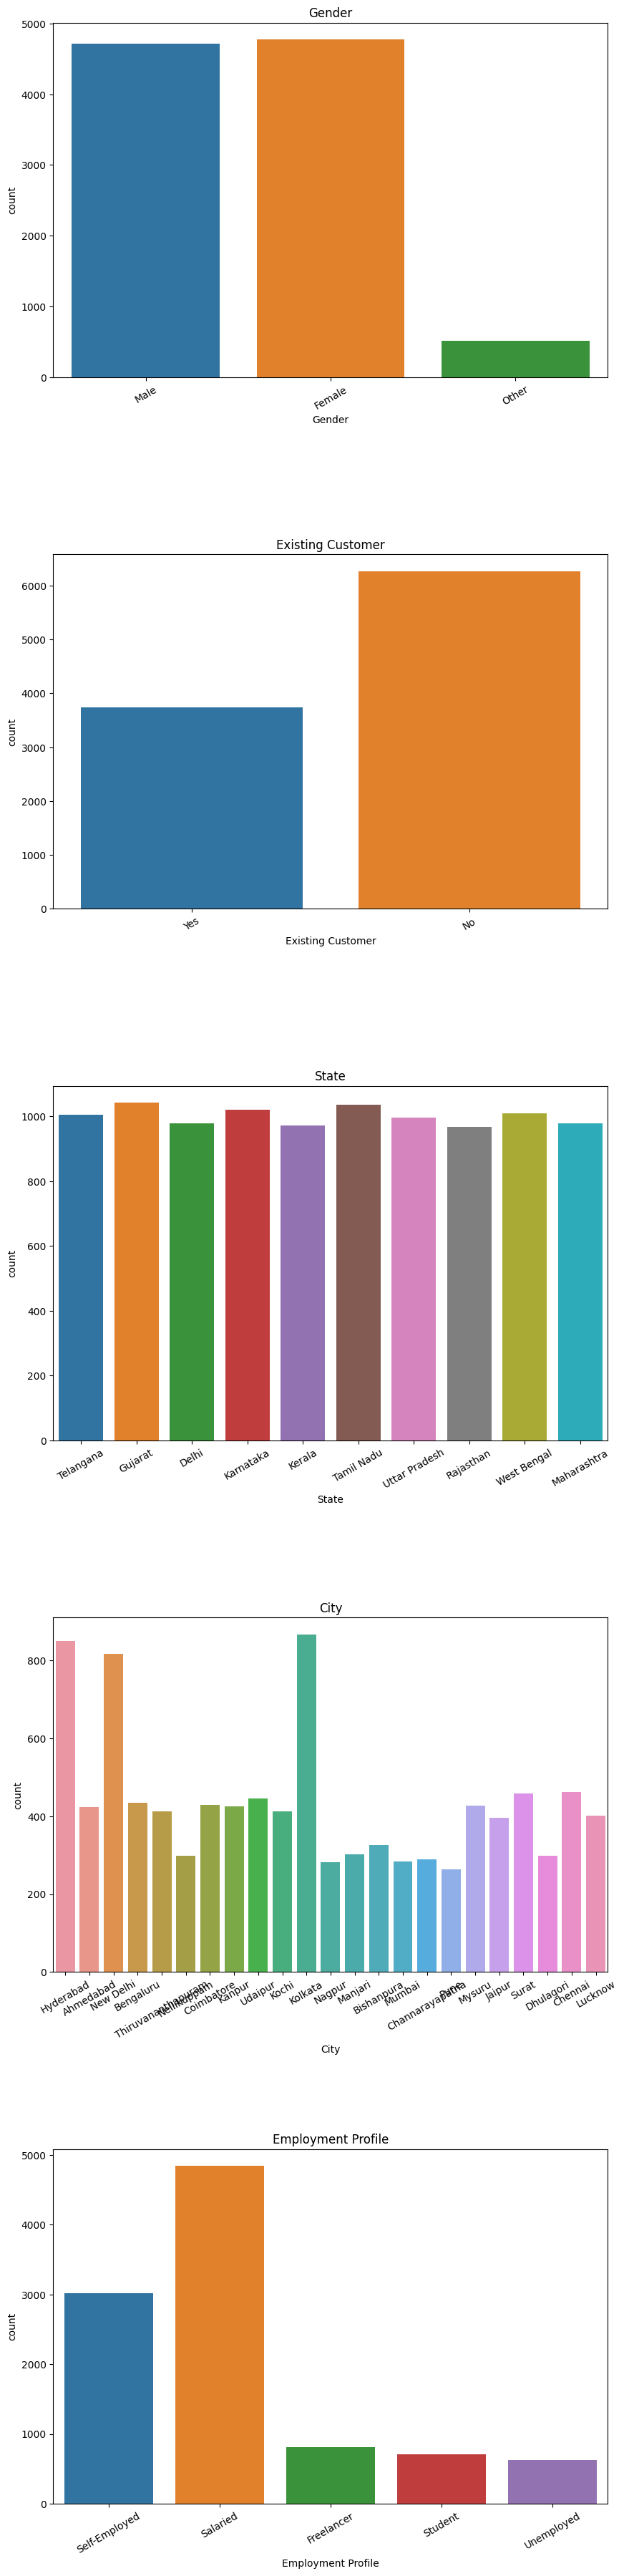

In [ ]:
col_object = ['Gender', 'Existing Customer', 'State', 'City', 'Employment Profile']

fig , ax = plt.subplots(nrows=len(col_object), ncols=1, figsize=(10,45))

fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(col_object):
  sns.countplot(x=col, data=dfd0, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


In [ ]:
dfd0.isnull().sum()

Age                           0
Gender                        0
Income                        0
Credit Score                  0
Credit History Length         0
Number of Existing Loans      0
Loan Amount                   0
Loan Tenure                   0
Existing Customer             0
State                         0
City                          0
LTV Ratio                     0
Employment Profile            0
Profile Score                 0
Occupation                  628
dtype: int64

De todas las columnas del dataset, la columna 'Occupation' posee 628 valores nulos, que es el 6,2% del total de datos, por lo que no es un número considerable para eliminar los valores.

In [ ]:
#Valores duplicados
dfd0.duplicated().sum()

157

In [ ]:
#Eliminamos los valores duplicados
dfd_0 = dfd0.drop_duplicates()
dfd_0.duplicated().sum()

0

# Análisis Univariado

## Histogramas

<Axes: xlabel='Income', ylabel='Count'>

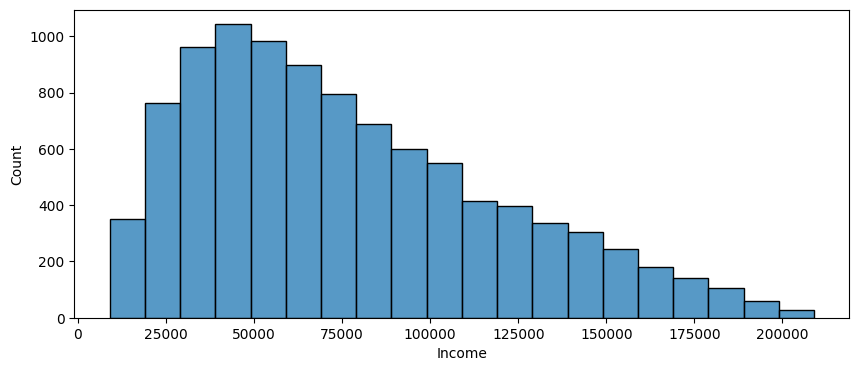

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x="Income", data=dfd_0, bins=20)

<Axes: xlabel='Age', ylabel='Count'>

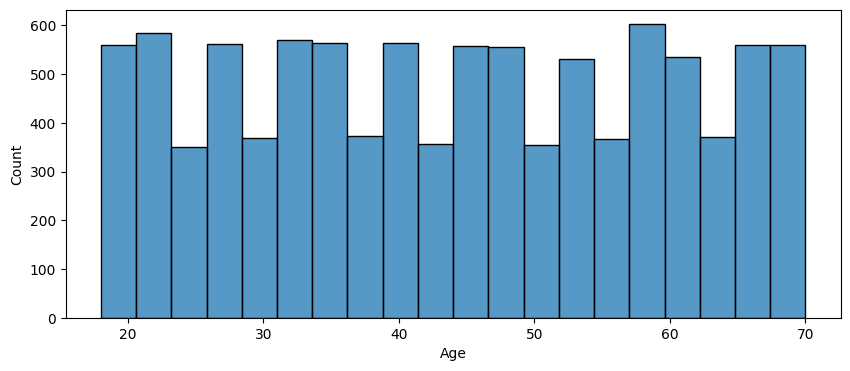

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x="Age", data=dfd_0, bins=6)

<Axes: xlabel='Credit History Length', ylabel='Count'>

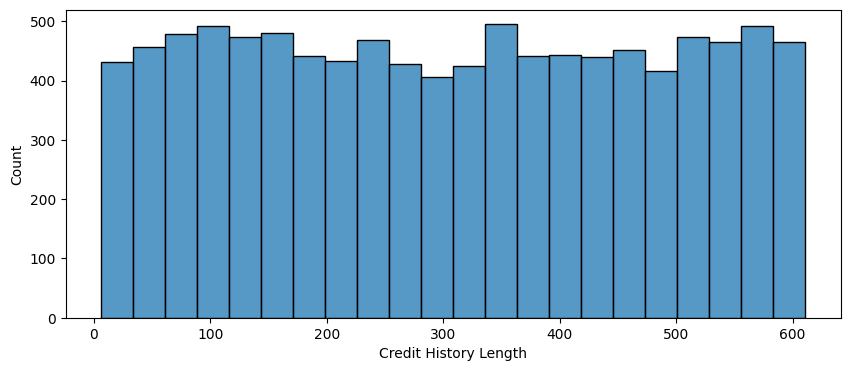

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x="Credit History Length", data=dfd0)

<Axes: xlabel='Credit Score', ylabel='Count'>

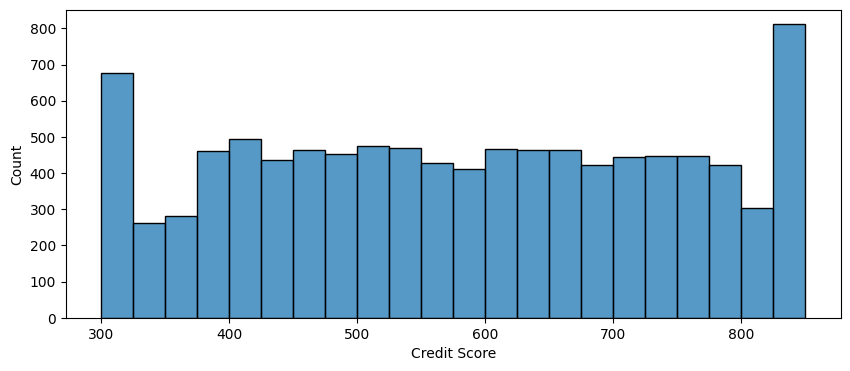

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(x="Credit Score", data=dfd0)

<Axes: xlabel='Number of Existing Loans', ylabel='Count'>

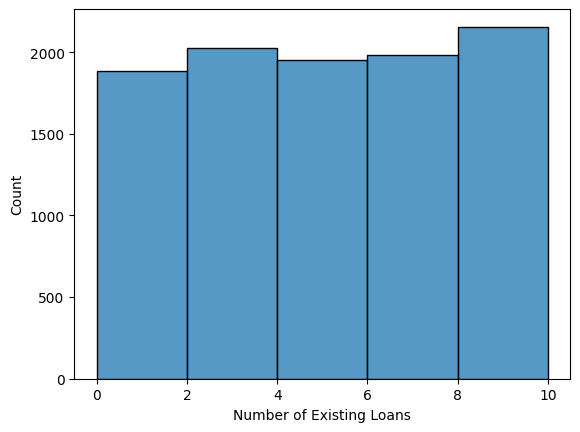

In [ ]:
sns.histplot(x="Number of Existing Loans", bins=5, data=dfd0)


El mayor número de prestamos se encuentra entre 8 y 10

##Gráfico de Cajas y Bigotes


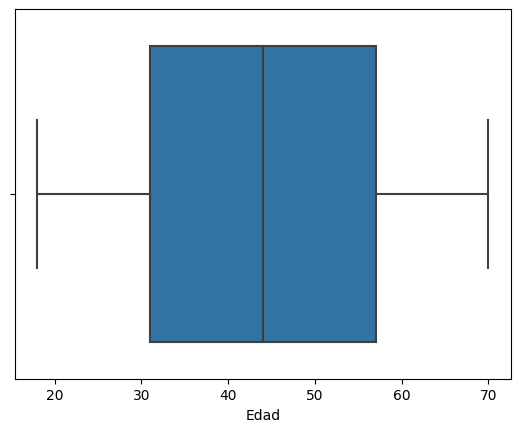

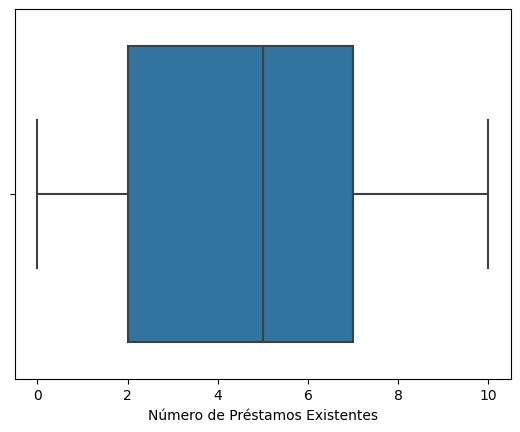

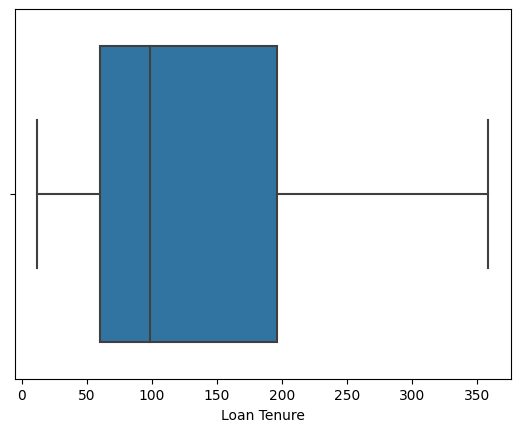

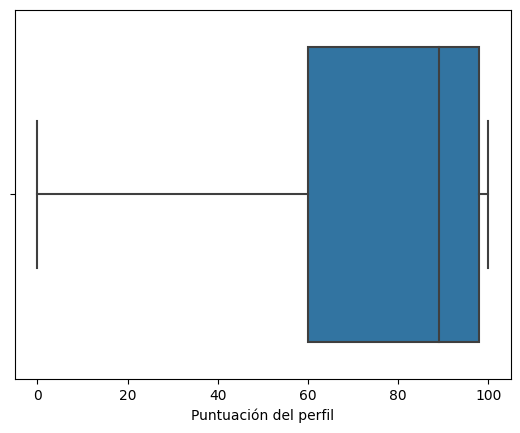

In [ ]:
sns.boxplot(x=dfd0['Age'])
plt.xlabel('Edad')
plt.show()

sns.boxplot(x=dfd0['Number of Existing Loans'], whis=2)
plt.xlabel('Número de Préstamos Existentes')
plt.show()

sns.boxplot(x=dfd0['Loan Tenure'], whis=2)
plt.xlabel('Loan Tenure')
plt.show()

sns.boxplot(x=dfd0['Profile Score'], whis=2)
plt.xlabel('Puntuación del perfil')
plt.show()

# Análisis bivariado

## Gráficas de Dispersión

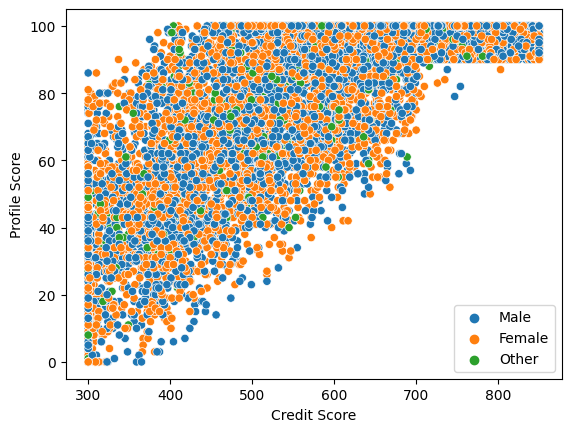

In [ ]:
sns.scatterplot(x="Credit Score", y="Profile Score", data=dfd0, hue="Gender")
plt.legend(loc="lower right")

De este gráfico que relaciona Edad(Age) con ingresos(Income), se puede observar que las personas jovenes poseen los sueldos mas bajos, y que aquellas personas con más ingresos son las pesonas con mayor edad.

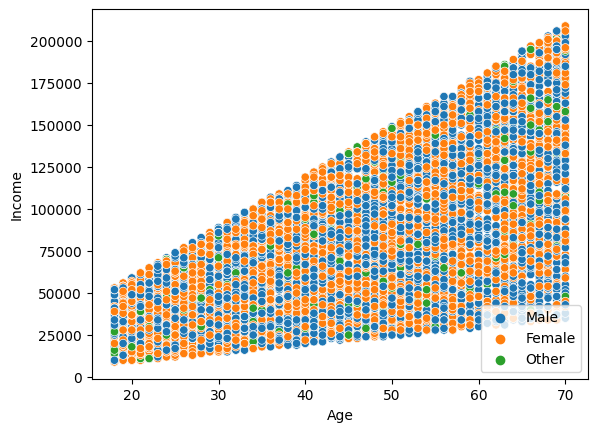

In [ ]:
sns.scatterplot(x="Age", y="Income", data=dfd0, hue="Gender")
plt.legend(loc="lower right")

De este gráfico que relaciona Puntaje crediticio(Credit Score) con Puntaje perfil(Profile Score), se puede observar que las personas que poseen un alto puntaje crediticio poseen un alto puntaje de perfil.

<ipython-input-93-ced37c5d1749>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfd0.corr()
<ipython-input-93-ced37c5d1749>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr,dtype = np.bool)


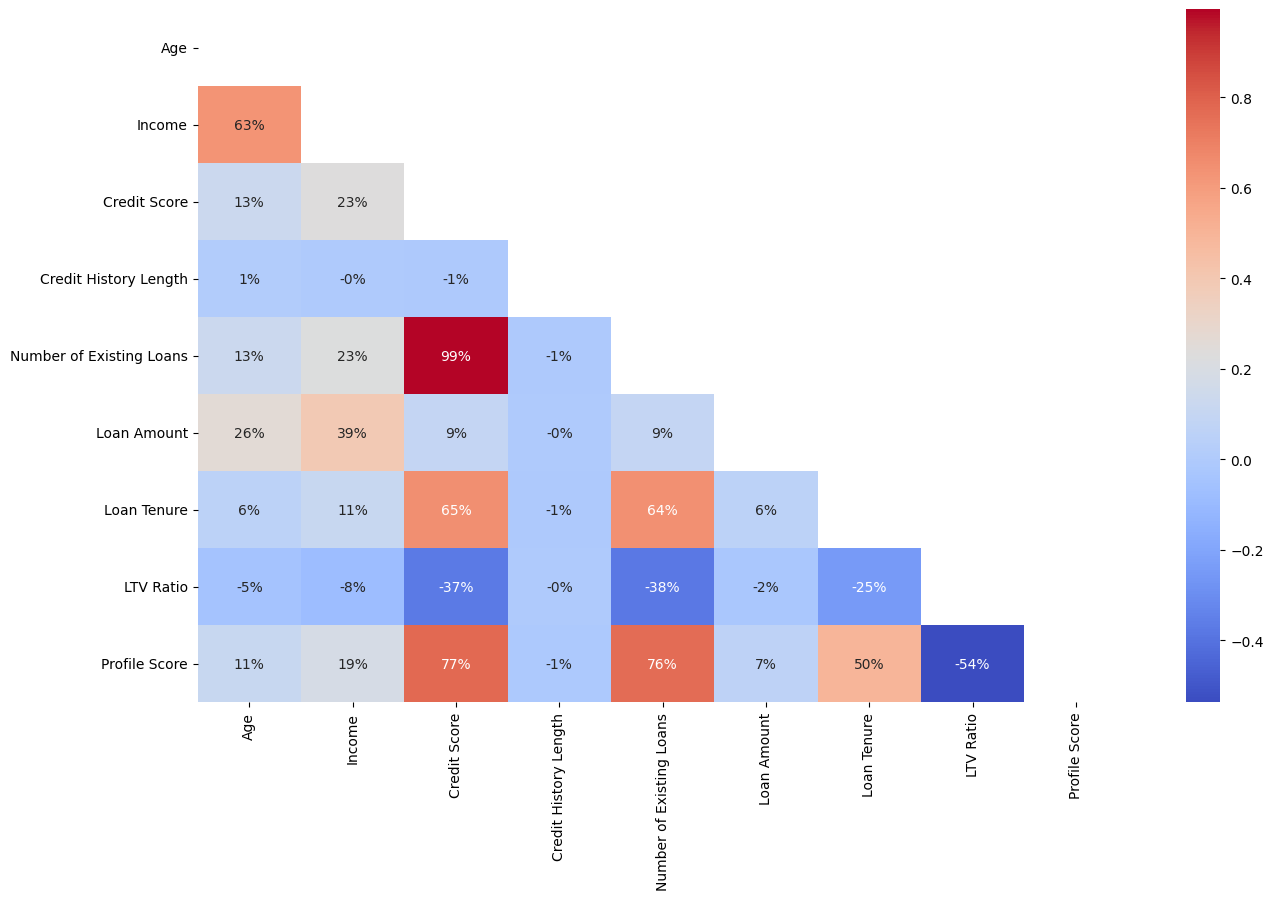

In [ ]:
plt.figure(figsize=(15,9))
corr = dfd0.corr()
mask = np.zeros_like(corr,dtype = np.bool)
mask[np.triu_indices_from(mask)]=True
sns.heatmap(corr, mask =mask, annot =True, fmt='.0%',cmap = 'coolwarm')
plt.show()

La correlación más fuerte es entre Number of Existing Loans y Credit Score con 0.994099, después le sigue Profile Score y Credit Score con 0.778799

#Análisis de las hipótesis

## Hipótesis N° 1
Las personas con antiguedad crediticia tienen trabajos más estables.

<Axes: xlabel='Employment Profile', ylabel='Profile Score'>

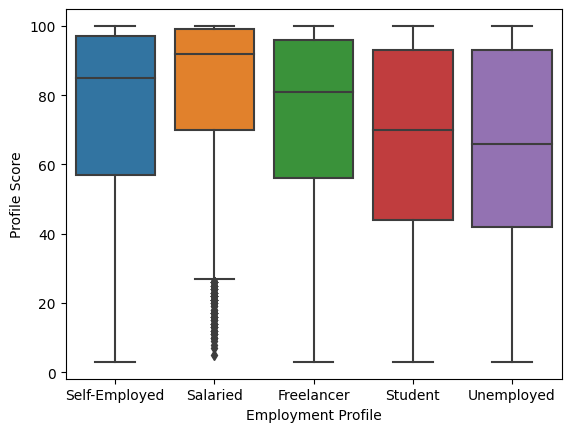

In [ ]:
df1 = dfd_0
sns.boxplot(x='Employment Profile', y='Profile Score', data=df1)


De este diagrama podemos ver que quienes estan bajo una relación de dependencia, personas asalariadas, poseen un alto Puntaje de perfil, en un paso anterior, se hizo el análisis de los outliers pero al no notar cambios después de sacarlo, no lo incluimos en esta versión de presentación.

Text(0, 0.5, 'Puntaje crediticio')

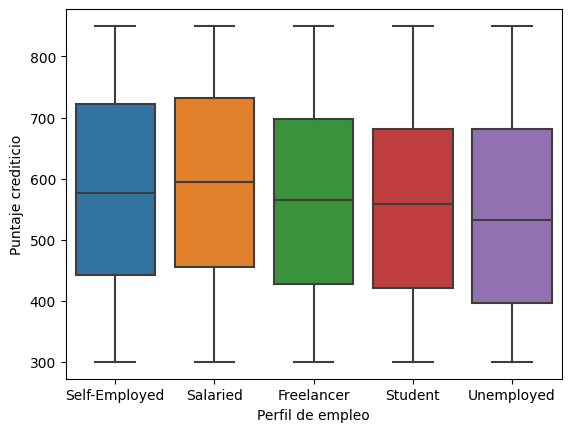

In [ ]:
sns.boxplot(x='Employment Profile', y='Credit Score', data=df1)
plt.xlabel('Perfil de empleo')
plt.ylabel('Puntaje crediticio')

De este diagrama podemos apreciar que una persona asalariada tienen una media mayor en puntaje crediticio.

Text(0, 0.5, 'Antigüedad del Historial Crediticio')

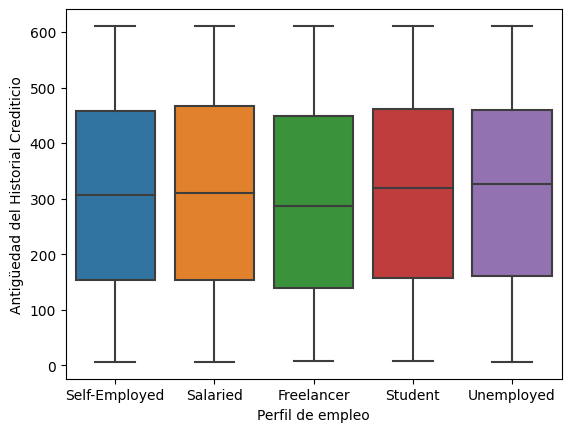

In [ ]:
sns.boxplot(x='Employment Profile', y='Credit History Length', data=df1)
plt.xlabel('Perfil de empleo')
plt.ylabel('Antigüedad del Historial Crediticio')

De este gráfico se puede apreciar que las personas laboralmente autónomas poseen una mediana mayor en la antigüedad del historial crediticio. A su vez quienes poseen menor antigüedad son las personas freelancers.

Text(0, 0.5, 'Número de Préstamos Existentes')

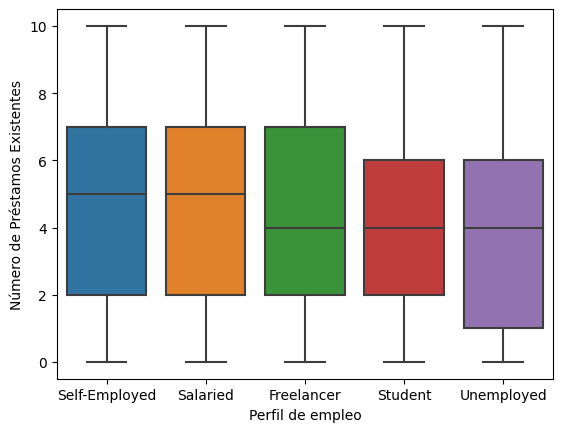

In [ ]:
sns.boxplot(x='Employment Profile', y='Number of Existing Loans', data=df1)
plt.xlabel('Perfil de empleo')
plt.ylabel('Número de Préstamos Existentes')

Quienes poseen más prestamos son las personas asalariadas, en cambio los estudiantes poseen la menor cantidad, esto puede deberse a que tienen un perfil con más riesgos para un banco.

In [ ]:
df1 = credit_df.sample(n=1000, random_state = 42) #Tomamos una muestra pequeña para poder visualizar mejor los datos.

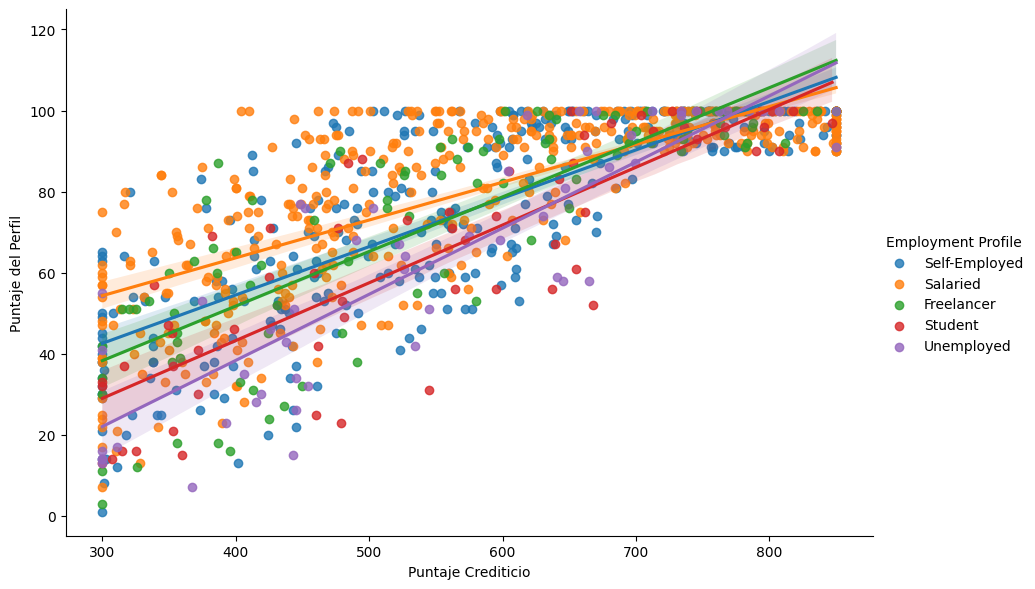

In [ ]:
sns.lmplot(x='Credit Score', y='Profile Score', data=df1, hue='Employment Profile', height=6, aspect=1.5)
plt.xlabel('Puntaje Crediticio')
plt.ylabel('Puntaje del Perfil')
plt.show()

### Conclusión hipótesis N° 1
Que aquellas personas que se encuentren en una situación laboral estable, tendrán mejor puntaje crediticio. Además, encontramos que las personas con mayor antiguedad son aquellos con trabajos autónomos y quienes pueden tener su propia empresa/PYME, esto se puede deber a que recurrieron a un prestamos desde que empezaron su propio negocio.

## Hipotesis N° 2
Que rango etario tiene mejor puntuación de perfil?, esto depende de sus ingresos?, depende de la cantidad de prestamos tiene activo?

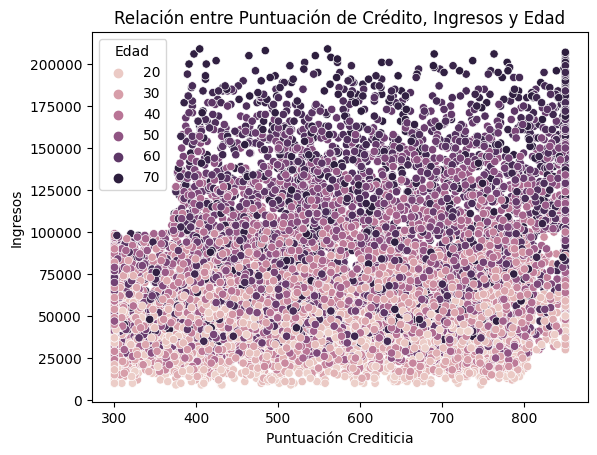

In [ ]:
df4 = dfd_0
sns.scatterplot(x='PuntuacionDeCredito', y='Ingreso', hue='Edad', data=df4)
plt.xlabel('Puntuación Crediticia')
plt.ylabel('Ingresos')
plt.title('Relación entre Puntuación de Crédito, Ingresos y Edad')
plt.show()

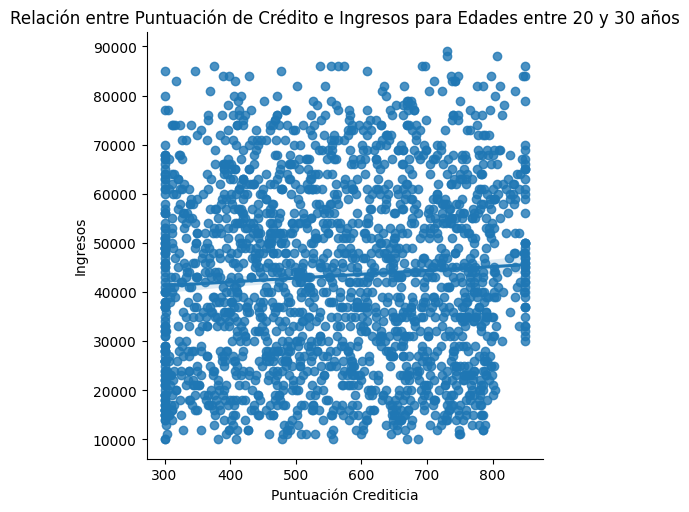

In [ ]:
#Nos quedamos con edades de entre 20 y 30 años
df4_20_30 = df4[(df4['Edad'] >= 20) & (df4['Edad'] <= 30)]

sns.lmplot(x='PuntuacionDeCredito', y='Ingreso', data=df4_20_30)
plt.xlabel('Puntuación Crediticia')
plt.ylabel('Ingresos')
plt.title('Relación entre Puntuación de Crédito e Ingresos para Edades entre 20 y 30 años')
plt.show()

Observamos que la puntuación crediticia está directamente relacionada con los ingresos.

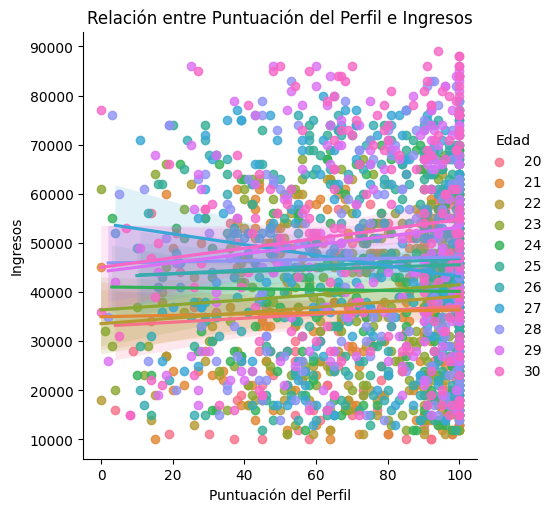

In [ ]:
sns.lmplot(x='PuntuacionDelPerfil', y='Ingreso', hue='Edad', data=df4_20_30)
plt.xlabel('Puntuación del Perfil')
plt.ylabel('Ingresos')
plt.title('Relación entre Puntuación del Perfil e Ingresos')
plt.show()

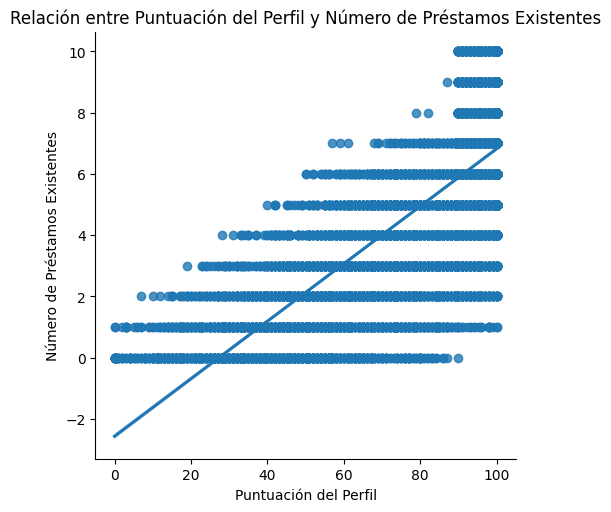

In [ ]:
sns.lmplot(x='PuntuacionDelPerfil', y='NroPrestamosExistentes', data=df4)
plt.xlabel('Puntuación del Perfil')
plt.ylabel('Número de Préstamos Existentes')
plt.title('Relación entre Puntuación del Perfil y Número de Préstamos Existentes')
plt.show()

###Conclusión hipotesis N° 4
Cuando mayor el ingreso, mejor es la puntuación crediticia, también observamos que aquellos que tienen mayor puntiación de perfil, tienen mayor número de préstamos. Con respecto al rango etario, no pudimos llegar a una conclusión ya que el comportamiento de los gráficos es muy similar en los diferentes rangos de edad.

# Aplicación de Modelos de ML

## Limpieza de datos - Employment Profile
  1) En caso de valores duplicados también se procederá a la eliminación de esas filas

  2) El valor de 'Other' en la columna Gender también sera eliminado para tener valores binarios en un futuro análisis y encoder

  3)En esta etapa se realizarán algunos cambios de como estan divididas las columnas debido a que poseen muchos valores unicos dentro de algunas columnas.
  Aquellas que tendran modificaciones serán:
  - Age
  - Credit History Length
  - Loan Amount
  - LTV Ratio

4) Se eliminarán estas columnas dejando a las nuevas con sus respectivos nuevos valores.
Las columnas 'City', 'State', 'Occupation' no se tomará en cuenta por ende también serán eliminadas





In [ ]:
#1
dfd2.nunique()

Age                           53
Gender                         3
Income                       201
Credit Score                 551
Credit History Length        606
Number of Existing Loans      11
Loan Amount                 6900
Loan Tenure                  348
Existing Customer              2
State                         10
City                          23
LTV Ratio                   7789
Employment Profile             5
Profile Score                101
Occupation                    14
dtype: int64

In [ ]:
dfd2.duplicated().sum()

157

In [ ]:
dfd2.drop_duplicates(inplace=True)

Para fines de

In [ ]:
# 2 delete Other in Gender
dfd3 = dfd2.copy()
dfd3 = dfd3.drop(dfd3[dfd3.Gender == 'Other'].index)
dfd3.isnull().sum()

Age                           0
Gender                        0
Income                        0
Credit Score                  0
Credit History Length         0
Number of Existing Loans      0
Loan Amount                   0
Loan Tenure                   0
Existing Customer             0
State                         0
City                          0
LTV Ratio                     0
Employment Profile            0
Profile Score                 0
Occupation                  586
dtype: int64

In [ ]:
# 3
dfd3_test = dfd3.copy()

bins = [18, 26, 34, 42, 51, 61, 71]
labels = ['18-25', '26-33', '34-41', '42-50', '51-60', '61-70']

dfd3_test['Age_range'] = pd.cut(dfd3_test['Age'],bins=bins, labels=labels, right=False)


In [ ]:
bins = [6200, 31000, 61000, 91000, 121000, 151000]
labels = ['6200-30000', '31000-60000', '61000-90000', '91000-120000', '121000-151000']

dfd3_test['Loan_Amount_range'] = pd.cut(dfd3_test['Loan Amount'],bins=bins, labels=labels, right=False)


In [ ]:
bins = [40, 61, 80, 96]
labels = ['Lower_LTV', 'Moderate_LTV', 'Higher_LTV']

dfd3_test['LTV_ratio_range'] = pd.cut(dfd3_test['LTV Ratio'],bins=bins, labels=labels, right=False)


In [ ]:
bins = [0, 12, 24, 60, 120, 240, 360, 480, 611]
labels = ['0-12 ', '13-24', '25-60', '61-120', '121-240', '241-360', '361-480', '481-more']

# Crear una nueva columna 'Rango de Antigüedad' basada en los rangos definidos
dfd3_test['Credit_history_lenght_range'] = pd.cut(dfd3_test['Credit History Length'], bins=bins, labels=labels, right=False)


4) Eliminación de columnas luego de categorizarlas y tambien otras columnas que no sera de uso para el desarrollo de la hipotesis

In [ ]:
dfd3 = dfd3_test.drop(['Age', 'Loan Amount', 'LTV Ratio','Credit History Length', 'State', 'Occupation', 'City'], axis=1)


In [ ]:
dfd3.head(10)

,Gender,Income,Credit Score,Number of Existing Loans,Loan Tenure,Existing Customer,Employment Profile,Profile Score,Age_range,Loan_Amount_range,LTV_ratio_range,Credit_history_lenght_range
201624,Male,32000,702,7,271,Yes,Self-Employed,100,18-25,91000-120000,Lower_LTV,241-360
272641,Male,164000,701,7,204,Yes,Salaried,100,51-60,121000-151000,Lower_LTV,481-more
176646,Female,34000,384,1,76,No,Salaried,45,42-50,121000-151000,Moderate_LTV,61-120
34609,Female,51000,300,0,23,No,Self-Employed,32,26-33,61000-90000,Moderate_LTV,121-240
231202,Female,52000,789,8,83,Yes,Salaried,99,51-60,91000-120000,Moderate_LTV,241-360
83044,Male,183000,850,10,85,Yes,Salaried,100,61-70,121000-151000,Lower_LTV,361-480
156290,Female,140000,410,2,52,No,Salaried,100,51-60,121000-151000,Lower_LTV,121-240
146131,Female,43000,608,5,209,No,Salaried,98,42-50,31000-60000,Lower_LTV,121-240
18871,Male,100000,509,3,24,No,Salaried,47,42-50,121000-151000,Higher_LTV,361-480
259318,Female,112000,730,7,215,Yes,Salaried,95,51-60,121000-151000,Moderate_LTV,481-more


In [ ]:
# Transformar valores a object para tener unificado
cols_obj = [col for col in dfd3.columns if dfd3[col].dtype == 'object']
for col_obj in cols_obj:
  dfd3[col_obj] = dfd3[col_obj].astype('category')

In [ ]:
dfd3.dtypes

Gender                         category
Income                            int64
Credit Score                      int64
Number of Existing Loans          int64
Loan Tenure                       int64
Existing Customer              category
Employment Profile             category
Profile Score                     int64
Age_range                      category
Loan_Amount_range              category
LTV_ratio_range                category
Credit_history_lenght_range    category
dtype: object

## Impresión de los nuevos valores

Luego de cambiar los valores de las columnas de tipo numerico a categorias de las siguientes columnas:

'Age_range', 'Loan_Amount_range', 'LTV_ratio_range', 'Credit_history_lenght_range'

Gráficos:

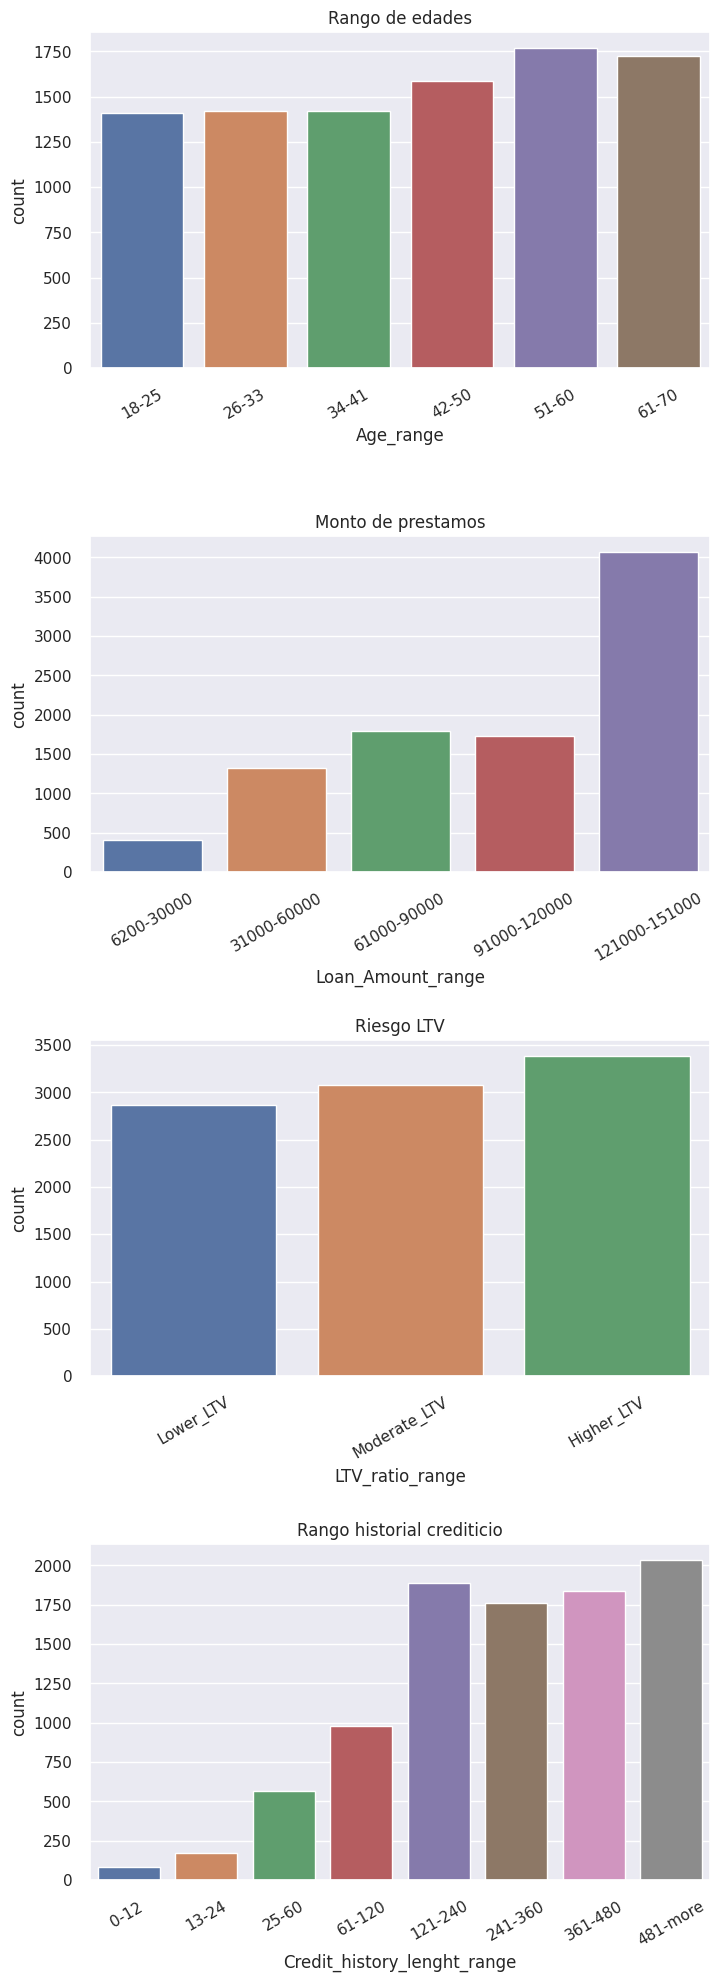

In [ ]:
# Seleccionar las columnas de tipo objeto
cols_category = ['Age_range', 'Loan_Amount_range', 'LTV_ratio_range', 'Credit_history_lenght_range']
cols_title_c = ['Rango de edades', 'Monto de prestamos', 'Riesgo LTV', 'Rango historial crediticio']
fig , ax = plt.subplots(nrows=len(cols_category), ncols=1, figsize=(8,24))
fig.subplots_adjust(hspace=0.5)
print(enumerate(cols_category))
for i, col in enumerate(cols_category):
  sns.countplot(x=col, data=dfd3, ax=ax[i])
  ax[i].set_title(cols_title_c[i])
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)



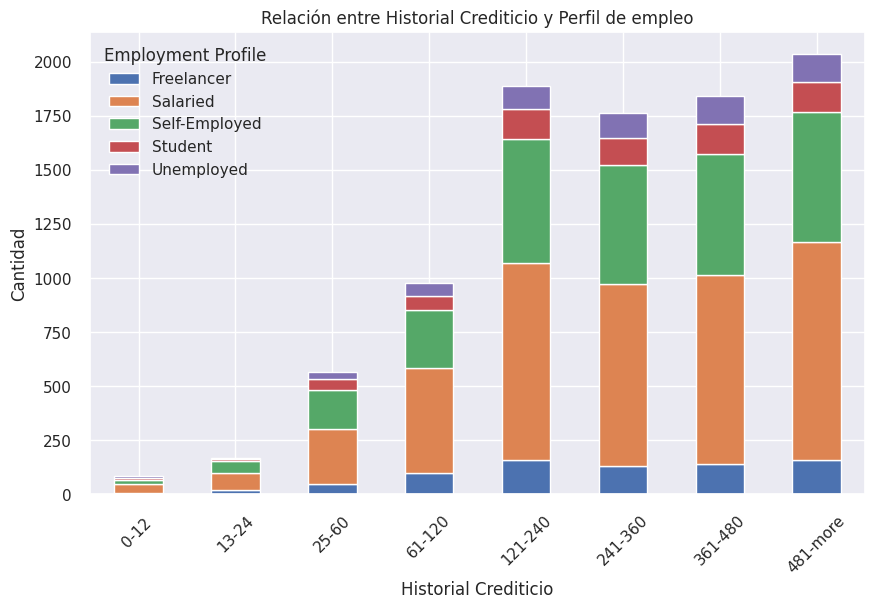

In [ ]:
contingency_table = pd.crosstab(dfd3['Credit_history_lenght_range'], dfd3['Employment Profile'])

# Mostrar la tabla de contingencia como un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Historial Crediticio y Perfil de empleo')
plt.xlabel('Historial Crediticio')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

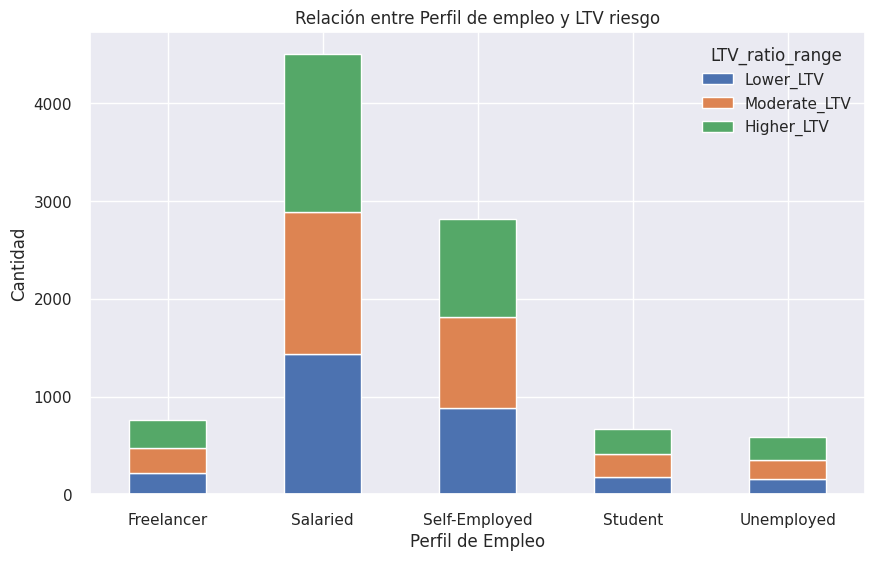

In [ ]:
contingency_table = pd.crosstab(dfd3['Employment Profile'], dfd3['LTV_ratio_range'])

# Mostrar la tabla de contingencia como un gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Relación entre Perfil de empleo y LTV riesgo')
plt.xlabel('Perfil de Empleo')
plt.ylabel('Cantidad')
plt.xticks(rotation=0)  # Rotar las etiquetas del eje x para una mejor visualización
plt.show()

## Encoder
De las columnas con valores categóricos se realizará una transformación de encoder Linear debido a que poseen muchos valores y si eligiesemos un método binario esto podría ocupar muchas columnas, estas columnas son: 'Age_range', 'Loan_Amount_range', 'LTV_ratio_range', 'Credit_history_lenght_range'

Binary
Para las columnas 'Existing Customer' y 'Gender' se usará el encoder Binario ya que solo puede poseer dos valores.

In [ ]:
!pip install category_encoders

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from category_encoders import BinaryEncoder, CountEncoder, TargetEncoder

In [ ]:
# Columnas a codificar
col_label_enconder = ['Age_range', 'Loan_Amount_range', 'LTV_ratio_range', 'Credit_history_lenght_range', 'Employment Profile']
binary_encoded = 'Existing Customer'
dummy_columns = ['Gender']

df_encoded = dfd3.copy()

label_encoder = LabelEncoder()
# Ajustar y transformar los datos
for col in col_label_enconder:
  label_encoded = label_encoder.fit_transform(dfd3[col])
  df_encoded[col] = label_encoded

df_encoded = pd.get_dummies(df_encoded, columns=dummy_columns)


In [ ]:
# Inicializar el codificador
binary_encoder = BinaryEncoder()

# Ajustar y transformar los datos
binary_encoded = binary_encoder.fit_transform(df_encoded[[binary_encoded]])

# Convertir el resultado a un DataFrame de Pandas
binary_encoded_df = pd.DataFrame(binary_encoded, columns=binary_encoder.get_feature_names_out())

# Unir los DataFrames
df_encoded_total = pd.concat([df_encoded, binary_encoded_df], axis=1)


In [ ]:
df_hipotesis_1 = df_encoded.drop(['Existing Customer'], axis=1)
df_hipotesis_1.head()

,Income,Credit Score,Number of Existing Loans,Loan Tenure,Employment Profile,Profile Score,Age_range,Loan_Amount_range,LTV_ratio_range,Credit_history_lenght_range,Gender_Female,Gender_Male
201624,32000,702,7,271,2,100,0,4,1,3,0,1
272641,164000,701,7,204,1,100,4,0,1,6,0,1
176646,34000,384,1,76,1,45,3,0,2,7,1,0
34609,51000,300,0,23,2,32,1,2,2,1,1,0
231202,52000,789,8,83,1,99,4,4,2,3,1,0


## Normalización de datos

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalizar los datos
scaler = StandardScaler()
df_hipotesis_1_normal = scaler.fit_transform(df_hipotesis_1)
df_hipotesis_1_normal_df = pd.DataFrame(df_hipotesis_1_normal, columns=df_hipotesis_1.columns)

## Correlacion actualizada


<ipython-input-801-7587b86e21f6>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask2 = np.zeros_like(corr2, dtype=np.bool)


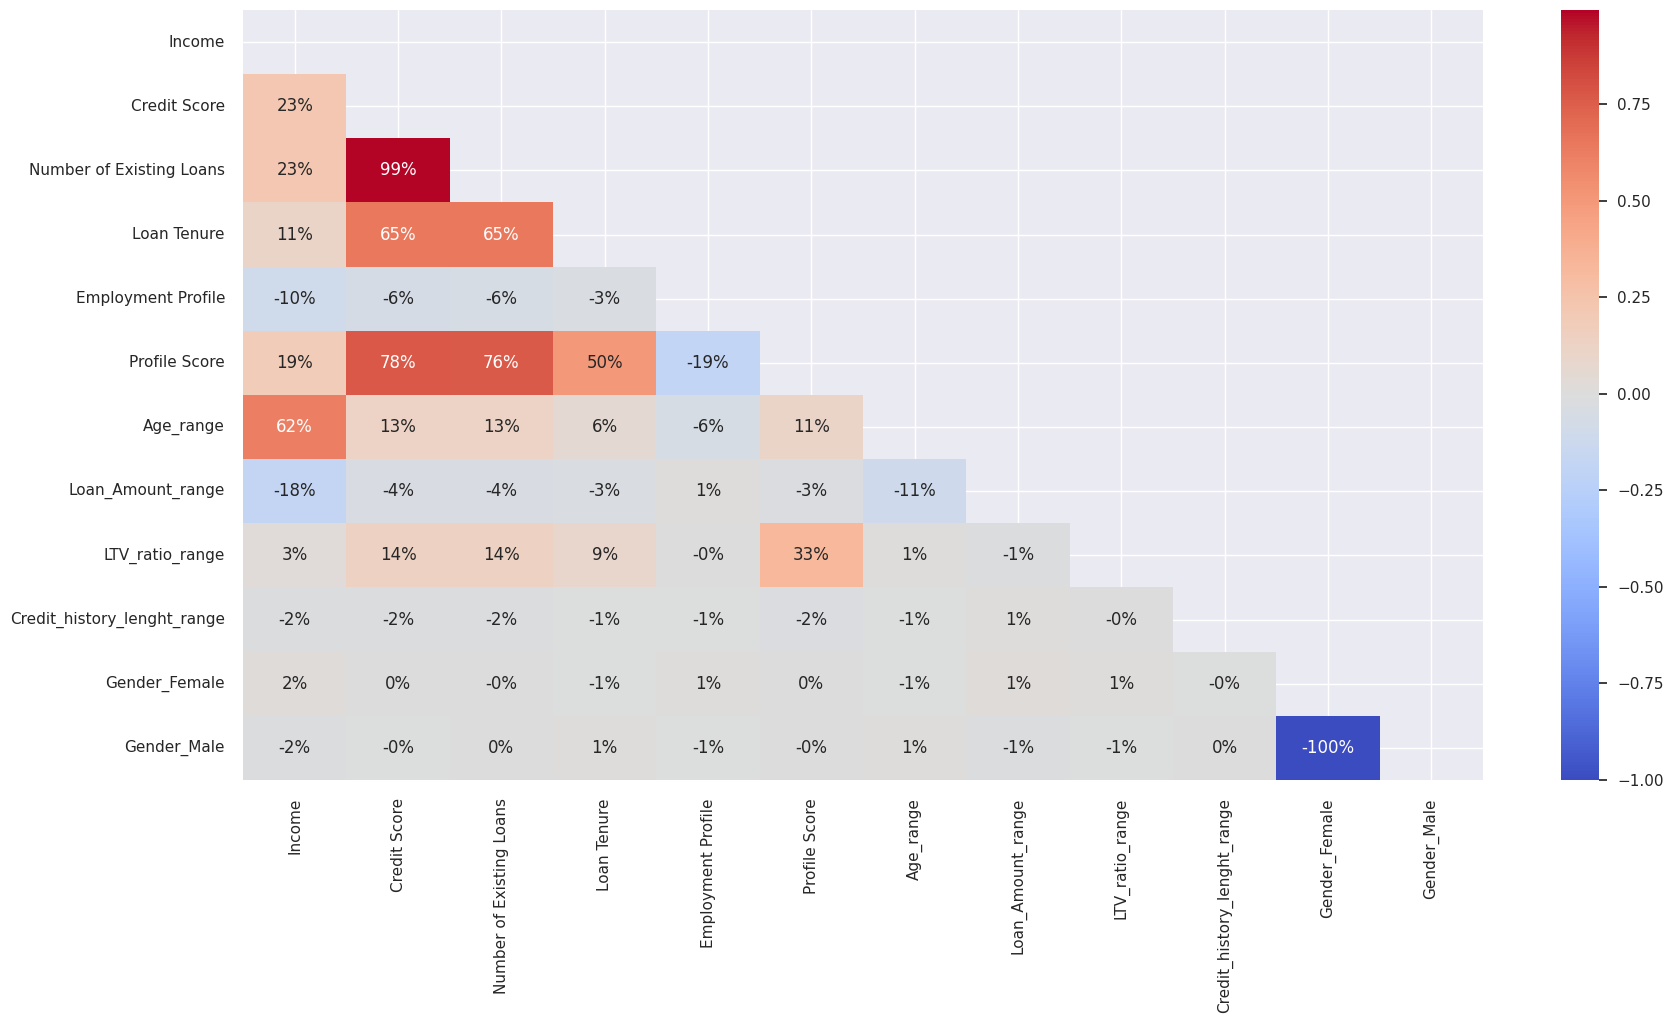

In [ ]:
#Creo de vuelta una matriz de correlacion con los valores encoded, para ver si hay algo que llame la atención
plt.figure(figsize=(20, 10))
corr2 = df_hipotesis_1_normal_df.corr()
mask2 = np.zeros_like(corr2, dtype=np.bool)
mask2[np.triu_indices_from(mask2)] = True
sns.heatmap(corr2, mask=mask2, annot=True, fmt='.0%', cmap='coolwarm')
plt.show()

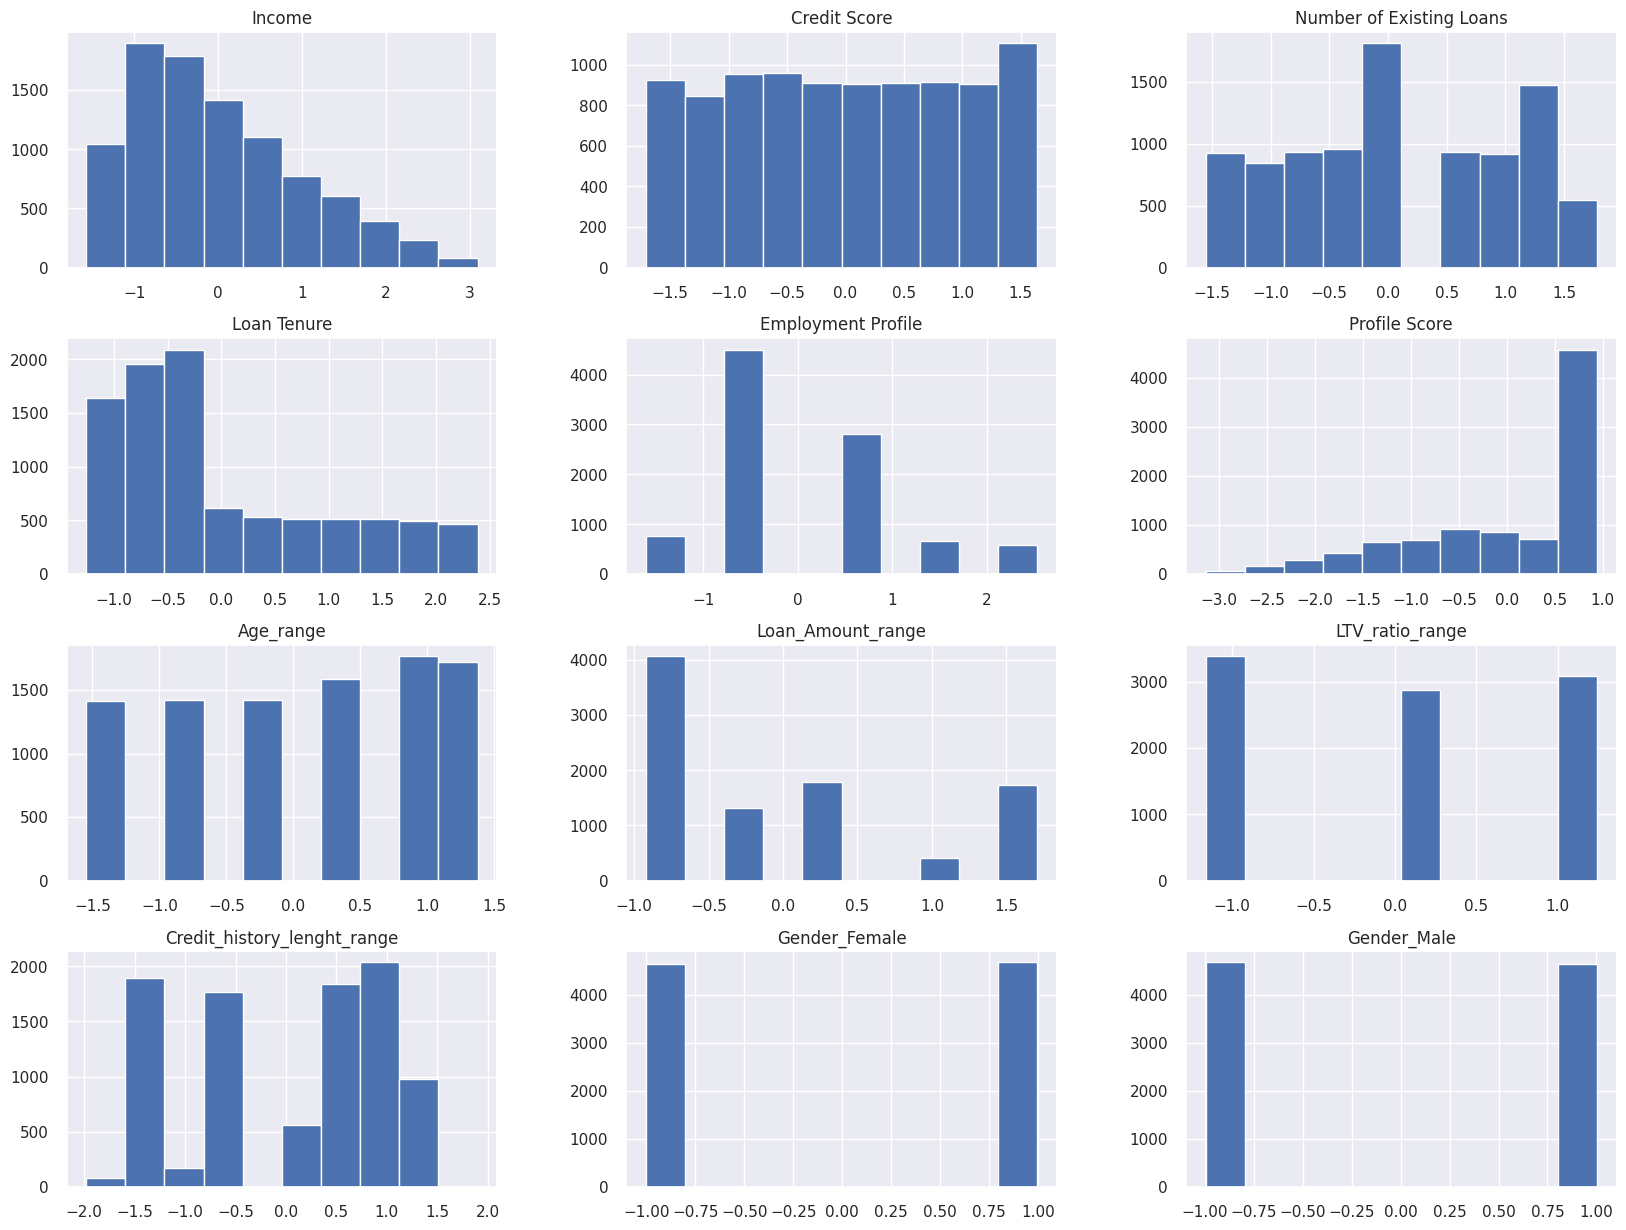

In [ ]:
sns.set()
df_hipotesis_1_normal_df.hist(bins=10, figsize=(20, 15))
plt.show()

## Linear regression - Employment Profile

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score


In [ ]:
# Separar las variables predictoras de la variable target
df_hipotesis_1_reg_1 = df_hipotesis_1_normal_df.copy()
X = df_hipotesis_1_reg_1.drop('Employment Profile', axis=1)
Y = df_hipotesis_1_reg_1['Employment Profile']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística borrar
#modelo = LinearRegression(max_iter=500)

# Crear una instancia del modelo de regresión lineal ordinaria
reg_ols = LinearRegression()
reg_ridge = Ridge()
reg_lasso = Lasso()

# Ajustar el modelo a los datos de entrenamiento
reg_ols.fit(X_train, y_train)
reg_ridge.fit(X_train, y_train)
reg_lasso.fit(X_train, y_train)


Lasso()

In [ ]:
# Predecir los valores de salida para los datos de prueba
y_pred = reg_ols.predict(X_test)
y_pred_ridge = reg_ridge.predict(X_test)
y_pred_lasso = reg_lasso.predict(X_test)

In [ ]:
# Calcular el error cuadrático medio (MSE) de las predicciones
mse = mean_squared_error(y_test, y_pred)
mser = mean_squared_error(y_test, y_pred_ridge)
msel = mean_squared_error(y_test, y_pred_lasso)
print(f"mse: {mse}")
print(f"mser: {mser}")
print(f"msel: {msel}")

mse: 0.9281811518223636
mser: 0.9281692244066883
msel: 0.9930175630000431


## Arbol de decisión DecisionTreeClassifier - Employment Profile

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
df_hipotesis_1_arbol = df_hipotesis_1.copy()
# Separar las variables predictoras de la variable target
X = df_hipotesis_1_arbol.drop('Age_range', axis=1)
y = df_hipotesis_1_arbol['Age_range']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de árbol de decisiones
arbol = DecisionTreeClassifier(random_state=42, max_depth=6)

# Entrenar el modelo con los datos de entrenamiento
arbol_predictorio = arbol.fit(X_train, y_train)

# Realizar predicciones con el conjunto de prueba
y_pred = arbol_predictorio.predict(X_test)

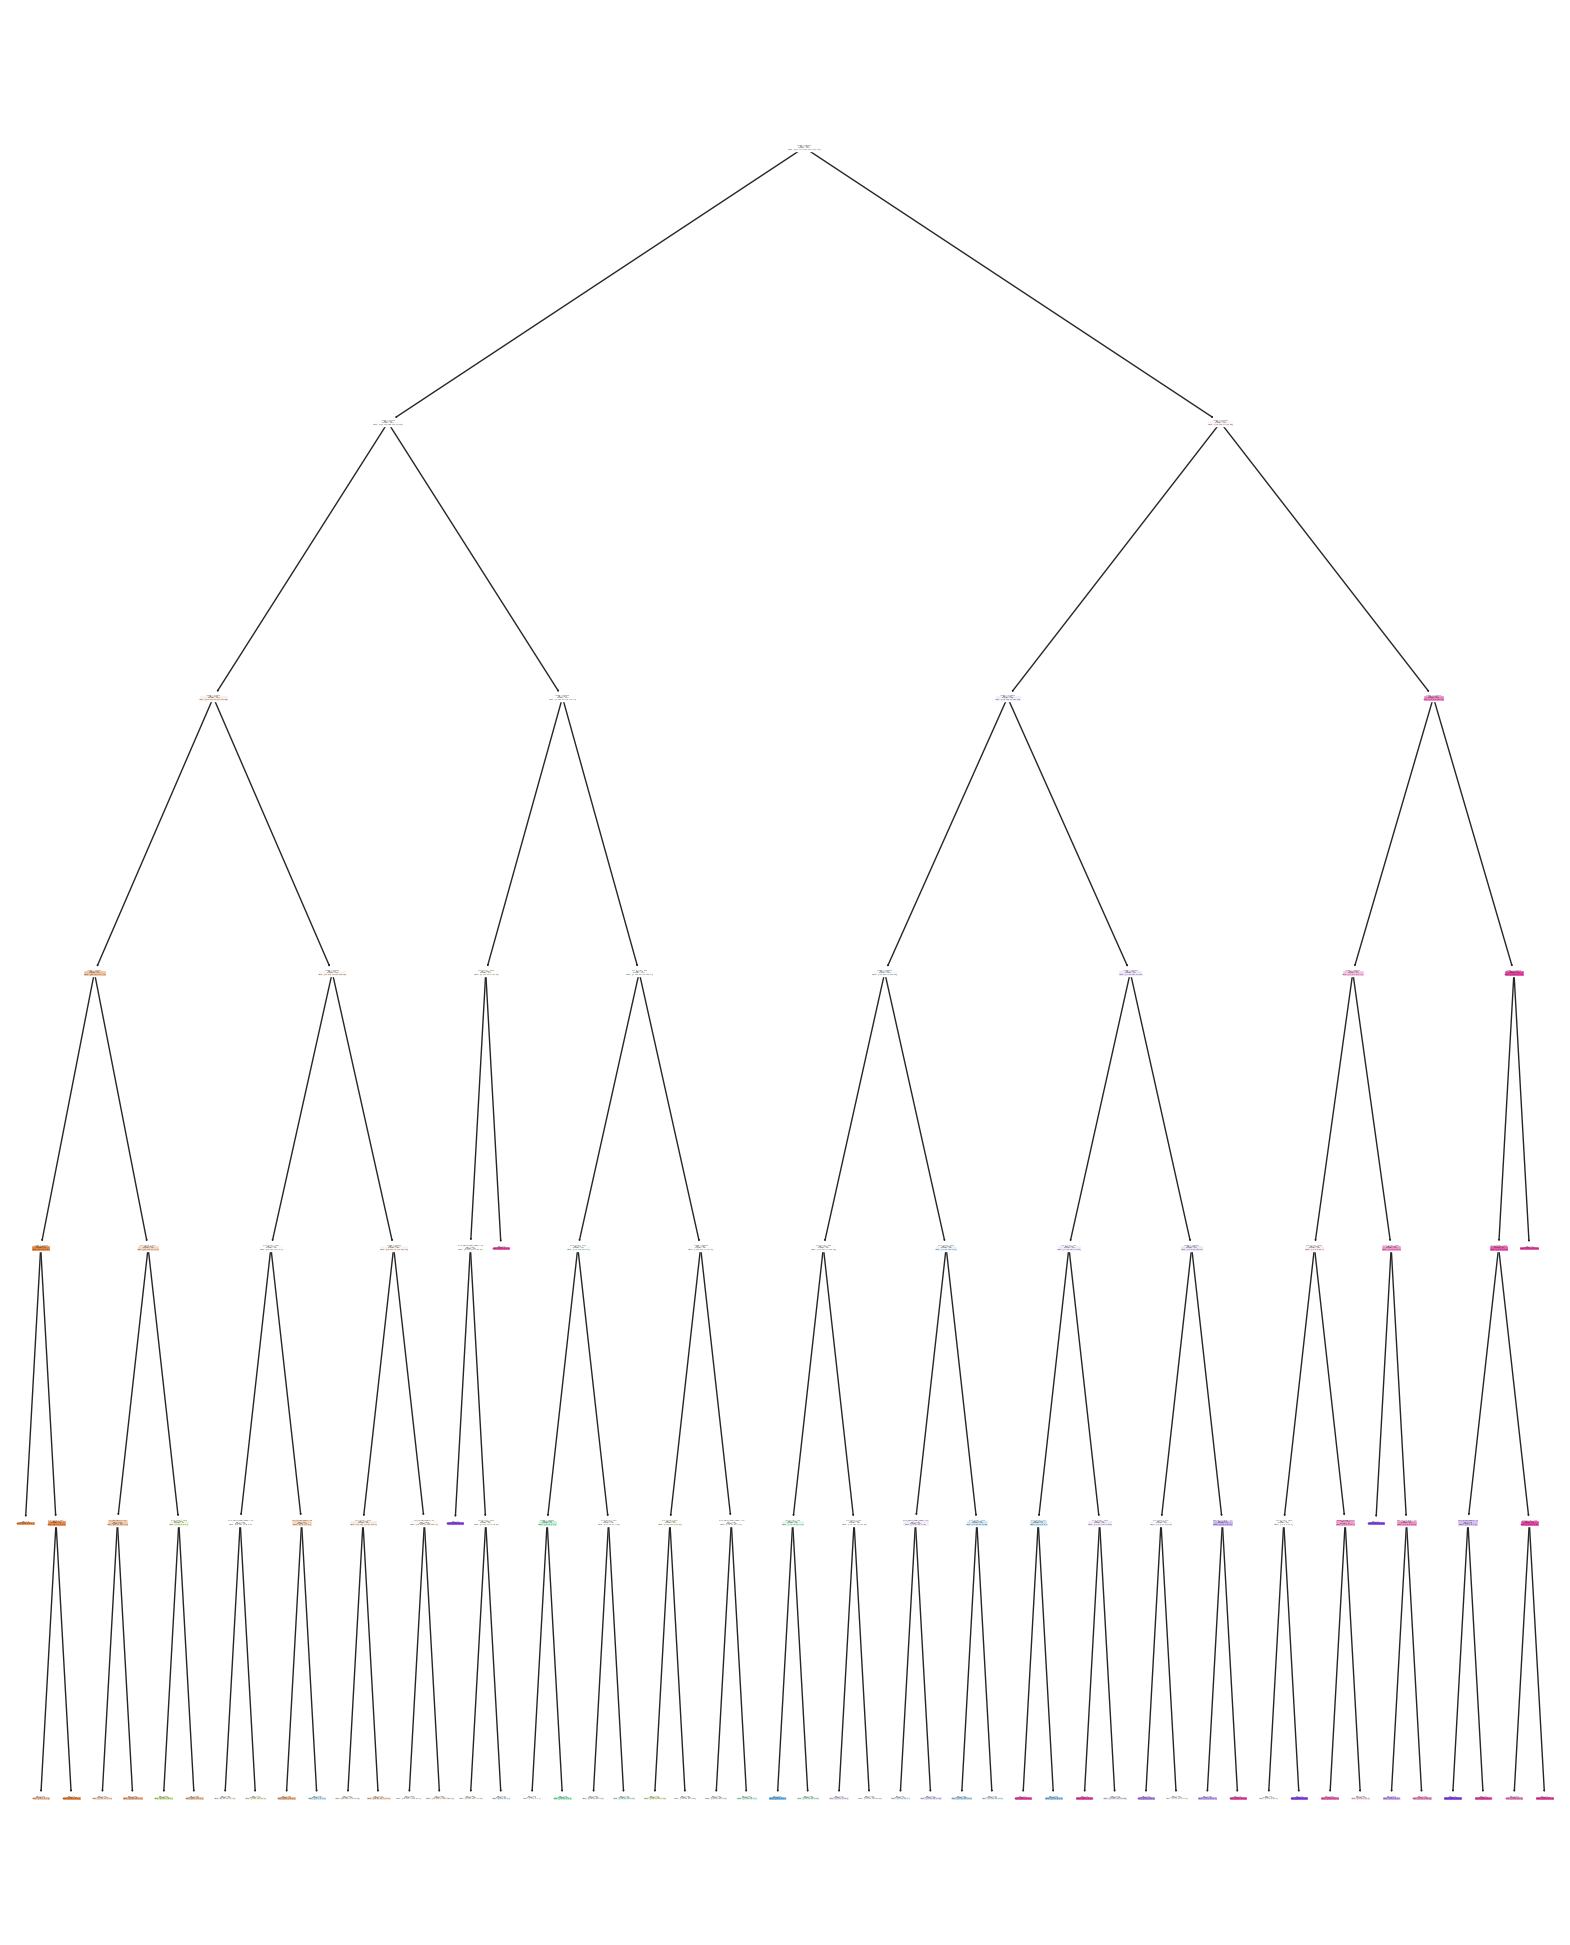

In [ ]:
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Graficar el árbol de decisiones
fig = plt.figure(figsize=(20,25))
plot_tree(arbol_predictorio, filled=True, feature_names=X.columns)
plt.show()

In [ ]:
# Calcular la precisión del modelo
precision = accuracy_score(y_test, y_pred)
print("Precisión del modelo: {:.2f}%".format(precision*100))
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

Precisión del modelo: 31.87%
3.292447777182646


## Arbol DecisionTreeRegressor - Employment Profile





In [ ]:
from sklearn.tree import DecisionTreeRegressor

df_hipotesis_1_tree_2 = df_hipotesis_1_normal_df.copy()
X = df_hipotesis_1_reg_1.drop('Employment Profile', axis=1)
y = df_hipotesis_1_reg_1['Employment Profile']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)

(6531, 12) (6531,)


In [ ]:
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

mse: 1.8995595690983282


## Modelo Random forest - Employment Profile

## separacion input output

In [ ]:
df_hipotesis_1_reg_2 = df_hipotesis_1_normal_df.copy()
X = df_hipotesis_1_reg_2.drop('Profile Score', axis=1)
y = df_hipotesis_1_reg_2['Profile Score']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

print(X_train.shape, y_train.shape)

(6531, 12) (6531,)


In [ ]:
print(X_test.shape, y_test.shape)

(2800, 12) (2800,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

In [ ]:
params = {
    'n_estimators' : [500],
    #'max_features': [50, 100],
    #'bootstrap': [False, True],
    'max_depth': [50, 500],
    #'min_samples_leaf': [3, 50],
    #'min_samples_split': [10, 50],
}

grid_rf = GridSearchCV(estimator = model_rf,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error', # es relevante cuando se utilizan herramientas de optimización como GridSearchCV en Scikit-learn. MAE, RMSE, etc., queremos minimizarlas
                        cv = 2,
                        refit='recall',
                        verbose = 1
                        )

In [ ]:
grid_rf.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [50, 500], 'n_estimators': [500]},
             refit='recall', scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
grid_rf.best_estimator_

RandomForestRegressor(max_depth=50, n_estimators=500)

In [ ]:
grid_rf.predict(X_train)
y_pred = grid_rf.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print(f'mse: {mse}')

mse: 0.17436115493319104


## Grafico predicción de error

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


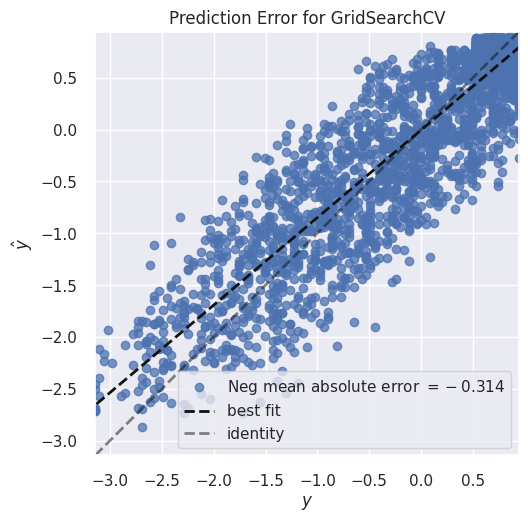

<Axes: title={'center': 'Prediction Error for GridSearchCV'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError

vis_pred_err = PredictionError(grid_rf)

vis_pred_err.fit(X_train, y_train)  # setear los datos al visualizador
vis_pred_err.score(X_test, y_test)  # calculo las métricas para test
vis_pred_err.show()

### Conclusión
Para encontrar la relación entre el perfil de empleo de una persona con los demás valores se llevaron a cabo varios algoritmos de los cuales se encuentran junto con sus erroes detallados

Linear Regression:
- mse: 0.9281811518223636
- mser: 0.9281692244066883
- msel: 0.9930175630000431


DecisionTreeClassifier:
- Precisión del modelo: 31.87%
- mse: 3.292447777182646

DecisionTreeRegressor:
- mse: 1.8995595690983282

Random Forest:
- mse: 0.17436115493319104

De todos los algoritmos quien tuvo una menor taza de error es RandomForest, por lo cual de aca en adelante se usará este algoritmo.
Algo para considerar es que en la mayoria de los algoritmos se normalizaron los valores pero con excepción del algoritmo DecisionTreeClassifier que no permite valores continuos.

El valor de Perfil de empleo se puede llegar a predecir, y tal como plantea la hipotesis las personas asalariadas tienen mayor proporción de historial crediticio, pero esto no se ve reflejado en un menor riesgo LTV.
